In [1]:
!pip3 install opencv-python

In [2]:
!pip3 install seaborn --upgrade

In [3]:
import cv2
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Load and Preprocess the Dataset

In [4]:
def load_subset_of_dataset(dataset_path, subset_size=5):
    images = []
    labels = []

    for condition in os.listdir(dataset_path):
        condition_path = os.path.join(dataset_path, condition)
        if condition_path == "dataset/.DS_Store":
            continue
        for i, image_filename in enumerate(os.listdir(condition_path)):
            if i >= subset_size:
                break
            image_path = os.path.join(condition_path, image_filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(condition)
    print(len(images))

    return images, labels

dataset_path = "dataset"
subset_size = 5

subset_images, subset_labels = load_subset_of_dataset(dataset_path, subset_size)

20


In [125]:
def load_dataset(dataset_path):
    images = []
    labels = []
    for condition in os.listdir(dataset_path):
        condition_path = os.path.join(dataset_path, condition)
        if condition_path == "dataset/.DS_Store":
            continue
        print(condition_path)
        for image_filename in os.listdir(condition_path):
            image_path = os.path.join(condition_path, image_filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(condition)
    return images, labels

dataset_path = "dataset"
images, labels = load_dataset(dataset_path)

# dataset_path = "dataset"
# set_size = 400

# images, labels = load_subset_of_dataset(dataset_path, set_size)

dataset/Control-Sagittal
dataset/Control-Axial
dataset/MS-Sagittal
dataset/MS-Axial


In [80]:
def printImgs(images, labels):
    num_columns = 5

    num_images = len(images)
    num_rows = (num_images + num_columns - 1) // num_columns

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

    axes = axes.flatten()

    for i in range(num_images):
        image = images[i]
        label = labels[i]

        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(label)
        axes[i].axis('off')

    for i in range(num_images, num_rows * num_columns):
        fig.delaxes(axes[i])

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    return

In [81]:
def histEqualisation(img):
    return cv2.equalizeHist(img)

subset_histEqualised = [histEqualisation(image) for image in subset_images]

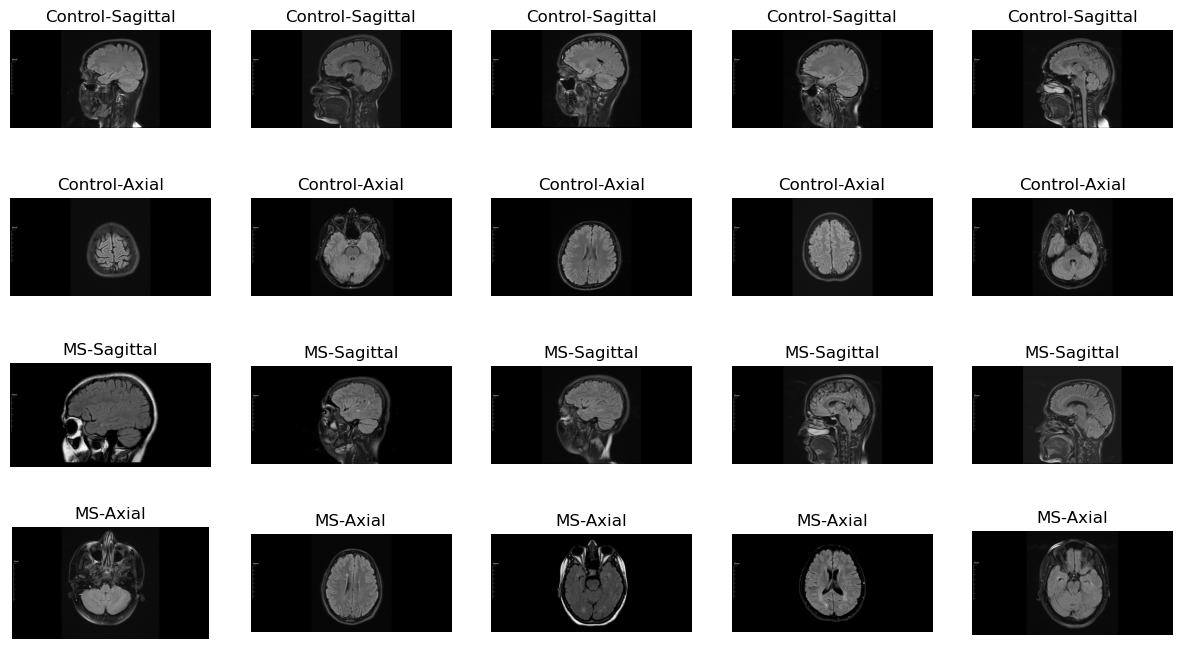

In [82]:
printImgs(subset_images, subset_labels)

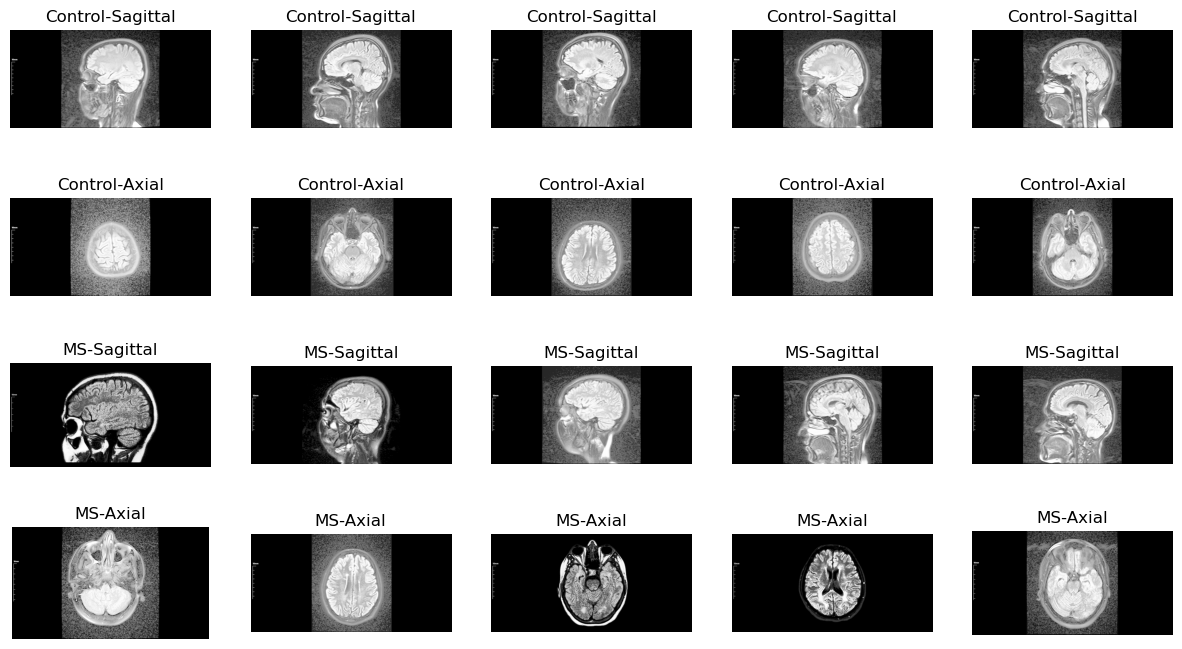

In [83]:
printImgs(subset_histEqualised, subset_labels)

# Preprocess the Images

In [84]:
# def preprocess_image(image, target_size=(84, 128)):
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     resized_image = cv2.resize(gray_image, target_size)
#     return resized_image

# preprocessed_images = [preprocess_image(image) for image in images]


In [126]:
def preprocess_image(image, target_size=(600, 1000)):
    resized_image = cv2.resize(image, target_size)
    return resized_image

resized_images = [preprocess_image(image) for image in images]

# Histogram Equalisation

In [58]:
# def histEqualisation(img):
#     return cv2.equalizeHist(img)

# histEqualised = [histEqualisation(image) for image in images]

# Classification using RAW image [1600 images]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.25, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)

nsamples, nx, ny = X_train.shape
x_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
x_test = X_test.reshape((nsamples,nx*ny))

In [63]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1200 400 1200 400


**1. SVM**

In [64]:
classifier = SVC(kernel='linear', C=1)

classifier.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [65]:
y_pred = classifier.predict(x_test)

**2. SVM POLY**

In [76]:
poly_classifier = SVC(kernel='poly', C=1)

poly_classifier.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [77]:
y_pred_svc_poly = poly_classifier.predict(x_test)

**3. KNN**

In [66]:
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
y_predict = knn_classifier.predict(x_test)

**4. Random Forest**

In [68]:
n_estimators = 100
max_depth = 20
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [69]:
y_prediction = random_forest_classifier.predict(x_test)

In [70]:
# svm_pipeline = (hog_features, classifier)

# with open('svm_pipeline.pkl', 'wb') as pipeline_file:
#     pickle.dump(hog_svm_pipeline, pipeline_file)

# Evaluate the Classifier for RAW image

**SVM**

Accuracy: 0.8675 



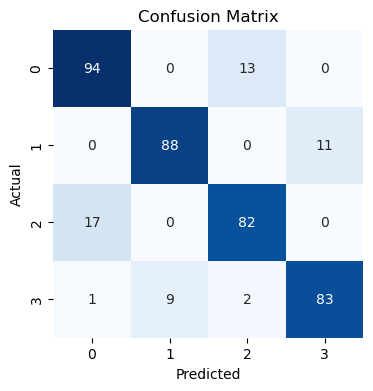



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.84      0.88      0.86       107
Control-Sagittal       0.91      0.89      0.90        99
        MS-Axial       0.85      0.83      0.84        99
     MS-Sagittal       0.88      0.87      0.88        95

        accuracy                           0.87       400
       macro avg       0.87      0.87      0.87       400
    weighted avg       0.87      0.87      0.87       400
 

Macro F1 Score: 0.87 

Micro F1 Score: 0.87 



In [71]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**SVM POLY**

Accuracy: 0.865 



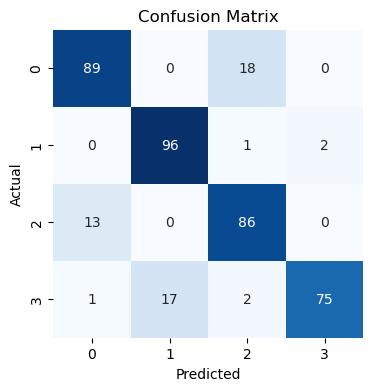



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.86      0.83      0.85       107
Control-Sagittal       0.85      0.97      0.91        99
        MS-Axial       0.80      0.87      0.83        99
     MS-Sagittal       0.97      0.79      0.87        95

        accuracy                           0.86       400
       macro avg       0.87      0.86      0.87       400
    weighted avg       0.87      0.86      0.86       400
 

Macro F1 Score: 0.87 

Micro F1 Score: 0.86 



In [78]:
accuracy = accuracy_score(y_test, y_pred_svc_poly)
cm = confusion_matrix(y_test, y_pred_svc_poly)
report = classification_report(y_test, y_pred_svc_poly)
macro_f1 = f1_score(y_test, y_pred_svc_poly, average='macro')
micro_f1 = f1_score(y_test, y_pred_svc_poly, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**KNN**

Accuracy: 0.835 



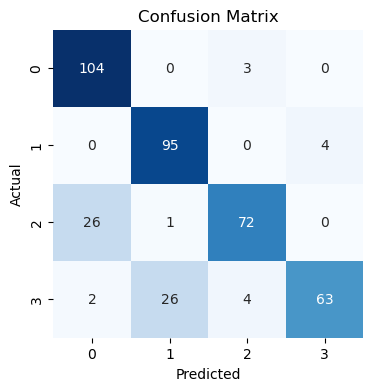



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.79      0.97      0.87       107
Control-Sagittal       0.78      0.96      0.86        99
        MS-Axial       0.91      0.73      0.81        99
     MS-Sagittal       0.94      0.66      0.78        95

        accuracy                           0.83       400
       macro avg       0.85      0.83      0.83       400
    weighted avg       0.85      0.83      0.83       400
 

Macro F1 Score: 0.83 

Micro F1 Score: 0.83 



In [72]:
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
report = classification_report(y_test, y_predict)
macro_f1 = f1_score(y_test, y_predict, average='macro')
micro_f1 = f1_score(y_test, y_predict, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**Random Forest**

Accuracy: 0.895 



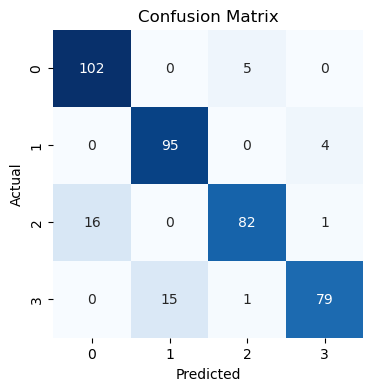



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.86      0.95      0.91       107
Control-Sagittal       0.86      0.96      0.91        99
        MS-Axial       0.93      0.83      0.88        99
     MS-Sagittal       0.94      0.83      0.88        95

        accuracy                           0.90       400
       macro avg       0.90      0.89      0.89       400
    weighted avg       0.90      0.90      0.89       400
 

Macro F1 Score: 0.89 

Micro F1 Score: 0.90 



In [73]:
accuracy = accuracy_score(y_test, y_prediction)
cm = confusion_matrix(y_test, y_prediction)
report = classification_report(y_test, y_prediction)
macro_f1 = f1_score(y_test, y_prediction, average='macro')
micro_f1 = f1_score(y_test, y_prediction, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

# Classification using LBP Features [Entire Dataset ~ 4000 images]

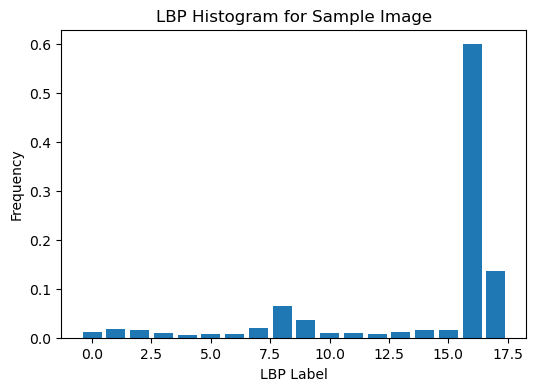

In [127]:
from skimage import feature

radius = 3
n_points = 16
method = 'uniform'

lbp_features = []

for image in resized_images:
    lbp_image = feature.local_binary_pattern(image, n_points, radius, method)
    
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    lbp_features.append(hist)

sample_lbp_image = lbp_features[1]

plt.figure(figsize=(6, 4))
plt.bar(range(0, len(sample_lbp_image)), sample_lbp_image)
plt.title("LBP Histogram for Sample Image")
plt.xlabel("LBP Label")
plt.ylabel("Frequency")
plt.show()

In [128]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(lbp_features, labels, test_size=0.25, random_state=42)

**1. SVM**

In [129]:
classifier1 = SVC(kernel='poly', C=10)

classifier1.fit(X_train1, y_train1)

SVC(C=10, kernel='poly')

In [130]:
y_pred1 = classifier1.predict(X_test1)

**2. KNN**

In [131]:
# k = 3
# knn_classifier1 = KNeighborsClassifier(n_neighbors=k)
# knn_classifier1.fit(X_train1, y_train1)

In [132]:
# y_predict1 = knn_classifier1.predict(X_test1)

**3. Random Forest**

In [133]:
n_estimators = 100
max_depth= 30
random_forest_classifier1 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
random_forest_classifier1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=30, random_state=42)

In [134]:
y_prediction1 = random_forest_classifier1.predict(X_test1)

# Evaluate the Classifier for LBP Features

**SVM**

Accuracy: 0.661610268378063 



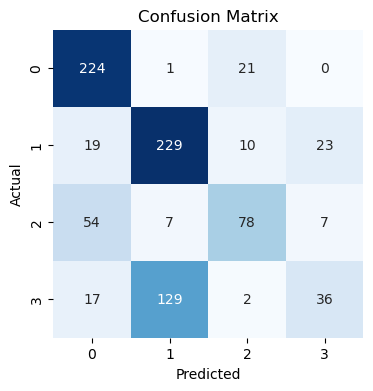



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.71      0.91      0.80       246
Control-Sagittal       0.63      0.81      0.71       281
        MS-Axial       0.70      0.53      0.61       146
     MS-Sagittal       0.55      0.20      0.29       184

        accuracy                           0.66       857
       macro avg       0.65      0.61      0.60       857
    weighted avg       0.65      0.66      0.63       857
 

Macro F1 Score: 0.60 

Micro F1 Score: 0.66 



In [135]:
accuracy = accuracy_score(y_test1, y_pred1)
cm = confusion_matrix(y_test1, y_pred1)
report = classification_report(y_test1, y_pred1)
macro_f1 = f1_score(y_test1, y_pred1, average='macro')
micro_f1 = f1_score(y_test1, y_pred1, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**KNN**

In [136]:
# accuracy = accuracy_score(y_test1, y_predict1)
# cm = confusion_matrix(y_test1, y_predict1)
# report = classification_report(y_test1, y_predict1)
# macro_f1 = f1_score(y_test1, y_predict1, average='macro')
# micro_f1 = f1_score(y_test1, y_predict1, average='micro')

# print("Accuracy:", accuracy, '\n')

# plt.figure(figsize=(4, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
# print('\n')

# print("Classification Report:")
# print(report, '\n')
# print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
# print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**Random Forest**

Accuracy: 0.8634772462077013 



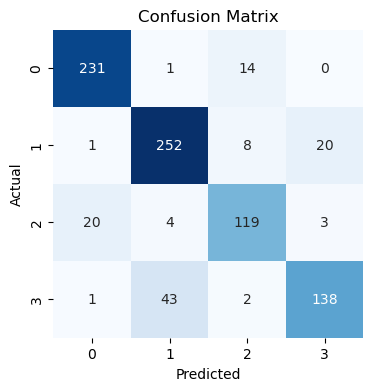



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.91      0.94      0.93       246
Control-Sagittal       0.84      0.90      0.87       281
        MS-Axial       0.83      0.82      0.82       146
     MS-Sagittal       0.86      0.75      0.80       184

        accuracy                           0.86       857
       macro avg       0.86      0.85      0.85       857
    weighted avg       0.86      0.86      0.86       857
 

Macro F1 Score: 0.85 

Micro F1 Score: 0.86 



In [137]:
accuracy = accuracy_score(y_test1, y_prediction1)
cm = confusion_matrix(y_test1, y_prediction1)
report = classification_report(y_test1, y_prediction1)
macro_f1 = f1_score(y_test1, y_prediction1, average='macro')
micro_f1 = f1_score(y_test1, y_prediction1, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

# Classification using Colour Histograms

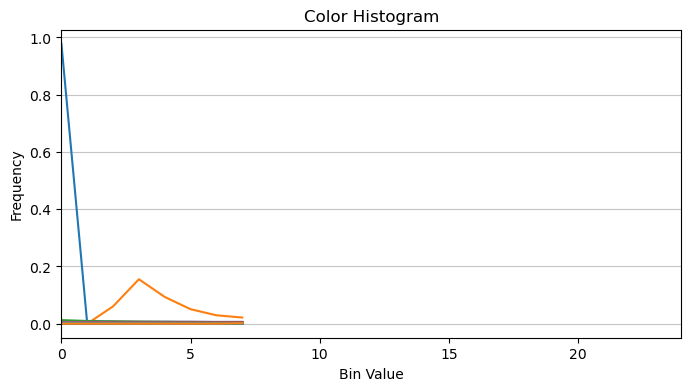

In [143]:
histograms = []

bins = 8

for image in images:
    histogram = cv2.calcHist([image],[0],None,[256],[0,256])

    histogram = cv2.normalize(histogram, histogram)

    histograms.append(histogram)

histograms_matrix = np.array(histograms)


plt.figure(figsize=(8, 4))
plt.title("Color Histogram")
plt.xlabel("Bin Value")
plt.ylabel("Frequency")
plt.xlim(0, 24)  # Adjust the range based on the number of bins
plt.grid(axis='y', alpha=0.75)
for i in range(0, histograms_matrix.shape[1], bins):
    plt.plot(histograms_matrix[0, i:i + bins])
plt.show()


In [157]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(histograms_matrix, labels, test_size=0.25, random_state=42)

x_train2 = np.array(x_train2)
x_test2 = np.array(x_test2)

nsamples, nx, ny = x_train2.shape
X_train2 = x_train2.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test2.shape
X_test2 = x_test2.reshape((nsamples,nx*ny))

In [158]:
X_train2.shape

(2570, 256)

**1. SVM**

In [159]:
classifier2 = SVC(kernel='poly', C=10)

classifier2.fit(X_train2, y_train2)

SVC(C=10, kernel='poly')

In [160]:
y_pred2 = classifier2.predict(X_test2)

**2. KNN**

In [161]:
# k = 2
# knn_classifier2 = KNeighborsClassifier(n_neighbors=k)
# knn_classifier2.fit(X_train2, y_train2)

In [162]:
# y_predict2 = knn_classifier2.predict(X_test2)

**3. Random Forest**

In [163]:
n_estimators = 100
max_depth= 20
random_forest_classifier2 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
random_forest_classifier2.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=20, random_state=42)

In [164]:
y_prediction2 = random_forest_classifier2.predict(X_test2)

#  Evaluate the Classifier for Colour Histogram Features

**SVM**

Accuracy: 0.7141190198366394 



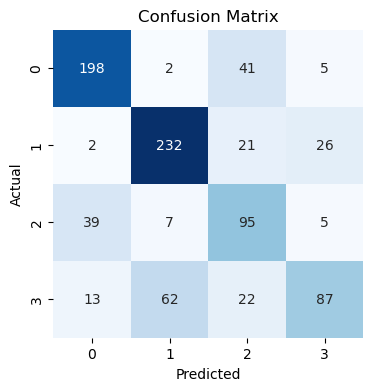



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.79      0.80      0.80       246
Control-Sagittal       0.77      0.83      0.79       281
        MS-Axial       0.53      0.65      0.58       146
     MS-Sagittal       0.71      0.47      0.57       184

        accuracy                           0.71       857
       macro avg       0.70      0.69      0.69       857
    weighted avg       0.72      0.71      0.71       857
 

Macro F1 Score: 0.69 

Micro F1 Score: 0.71 



In [165]:
accuracy = accuracy_score(y_test2, y_pred2)
cm = confusion_matrix(y_test2, y_pred2)
report = classification_report(y_test2, y_pred2)
macro_f1 = f1_score(y_test2, y_pred2, average='macro')
micro_f1 = f1_score(y_test2, y_pred2, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**KNN**

In [167]:
# accuracy = accuracy_score(y_test2, y_predict2)
# cm = confusion_matrix(y_test2, y_predict2)
# report = classification_report(y_test2, y_predict2)
# macro_f1 = f1_score(y_test2, y_predict2, average='macro')
# micro_f1 = f1_score(y_test2, y_predict2, average='micro')

# print("Accuracy:", accuracy, '\n')

# plt.figure(figsize=(4, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
# print('\n')

# print("Classification Report:")
# print(report, '\n')
# print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
# print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**Random Forest**

Accuracy: 0.9323220536756126 



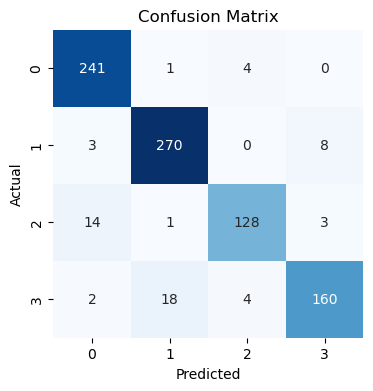



Classification Report:
                  precision    recall  f1-score   support

   Control-Axial       0.93      0.98      0.95       246
Control-Sagittal       0.93      0.96      0.95       281
        MS-Axial       0.94      0.88      0.91       146
     MS-Sagittal       0.94      0.87      0.90       184

        accuracy                           0.93       857
       macro avg       0.93      0.92      0.93       857
    weighted avg       0.93      0.93      0.93       857
 

Macro F1 Score: 0.93 

Micro F1 Score: 0.93 



In [169]:
accuracy = accuracy_score(y_test2, y_prediction2)
cm = confusion_matrix(y_test2, y_prediction2)
report = classification_report(y_test2, y_prediction2)
macro_f1 = f1_score(y_test2, y_prediction2, average='macro')
micro_f1 = f1_score(y_test2, y_prediction2, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')